In [1]:
%load_ext autoreload
%autoreload 2

import spatialdata as sd
import spatialdata_plot

import bento as bt

/home/ckmah/mambaforge/envs/spatialdata_refactor/lib/python3.10/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.11.3-CAPI-1.17.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/home/ckmah/mambaforge/envs/spatialdata_refactor/lib/python3.10/site-packages/spatialdata/__init__.py:11: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


In [2]:
data = sd.read_zarr("/mnt/d/sdata/xenium_rep1_io/small_data.zarr")

In [21]:
sd.read_zarr("https://s3.embl.de/spatialdata/spatialdata-sandbox/mibitof.zarr/")

SpatialData object with:
├── Images
│     ├── 'point8_image': SpatialImage[cyx] (3, 1024, 1024)
│     ├── 'point16_image': SpatialImage[cyx] (3, 1024, 1024)
│     └── 'point23_image': SpatialImage[cyx] (3, 1024, 1024)
└── Labels
      ├── 'point8_labels': SpatialImage[yx] (1024, 1024)
      ├── 'point16_labels': SpatialImage[yx] (1024, 1024)
      └── 'point23_labels': SpatialImage[yx] (1024, 1024)
with coordinate systems:
▸ 'point8', with elements:
        point8_image (Images), point8_labels (Labels)
▸ 'point16', with elements:
        point16_image (Images), point16_labels (Labels)
▸ 'point23', with elements:
        point23_image (Images), point23_labels (Labels)

In [4]:
bt.io.format_sdata(
    data,
    points_key="transcripts",
    instance_key="cell_boundaries",
    feature_key="feature_name",
    shape_keys=["cell_boundaries", "nucleus_boundaries"],
)

SpatialData object with:
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 9) (2D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (27, 3) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (41, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (35, 2) (2D shapes)
└── Table
      └── AnnData object with n_obs × n_vars = 27 × 541
    obs: 'cell_boundaries', 'region'
    uns: 'spatialdata_attrs': AnnData (27, 541)
with coordinate systems:
▸ 'global', with elements:
        transcripts (Points), cell_boundaries (Shapes), cell_circles (Shapes), nucleus_boundaries (Shapes)

In [7]:
bt.tl.flux(
    sdata=data,
    points_key="transcripts",
    instance_key="cell_boundaries",
    feature_key="feature_name",
)


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

In [13]:
bt.tl.fluxmap(
    sdata=data,
    points_key="transcripts",
    instance_key="cell_boundaries",
    train_size=1,
    n_clusters=3,
    # plot_error=False,
)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

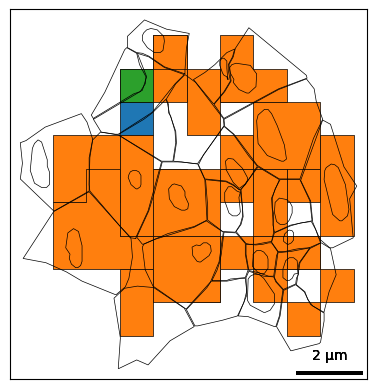

In [14]:
bt.pl.fluxmap(data)

In [16]:
bt.tl.coloc_quotient(data, shapes=["cell_boundaries"])

cell_boundaries:   0%|          | 0/27 [00:00<?, ?it/s]

Preparing tensor...
:running: Decomposing tensor...


Device cpu:   0%|          | 0/2 [00:00<?, ?it/s]

:heavy_check_mark: Done.


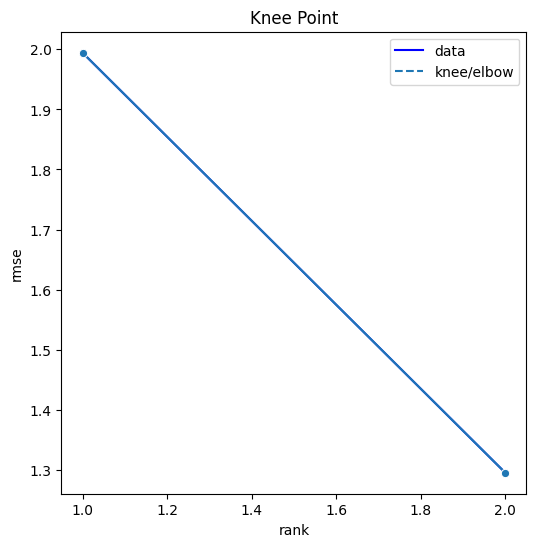

In [18]:
bt.tl.colocation(data, ranks=range(1, 3))

In [15]:
data["transcripts"]

,x,y,feature_name,cell_id,transcript_id,qv,overlaps_nucleus,cell_boundaries,nucleus_boundaries,fluxmap1_boundaries,fluxmap2_boundaries,fluxmap3_boundaries
npartitions=1,,,,,,,,,,,,
,float32,float32,category[unknown],int32,uint64,float32,uint8,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...


In [6]:
data.write("../bento/datasets/bt_small_data.zarr")

INFO     The Zarr file used for backing will now change from /mnt/d/sdata/xenium_rep1_io/small_data.zarr to        
         ../bento/datasets/bt_small_data.zarr                                                                      
